In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

### The data

In [2]:
fashion_mnist = keras.datasets.fashion_mnist.load_data()

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_val, y_val = X_train_full[-5000:], y_train_full[-5000:]

X_train, X_val, X_test = X_train / 255, X_val / 255, X_test / 255

In [3]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [6]:
def build_model(seed=42):
    tf.random.set_seed(seed)
  
    return keras.Sequential([
        keras.layers.Flatten(input_shape=[28, 28]),
        keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
        keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
        keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
        keras.layers.Dense(10, activation="softmax")
    ])


def build_and_train_model(optimizer):
    model = build_model()
    model.compile(
        loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"]
    )

    return model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

In [7]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

In [8]:
history_sgd = build_and_train_model(optimizer)

Epoch 1/30
1719/1719 [==============================] - 8s 3ms/step - loss: 1.4136 - accuracy: 0.5783 - val_loss: 0.9090 - val_accuracy: 0.7134
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8105 - accuracy: 0.7291 - val_loss: 0.7105 - val_accuracy: 0.7546
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6819 - accuracy: 0.7684 - val_loss: 0.6247 - val_accuracy: 0.7820
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6146 - accuracy: 0.7928 - val_loss: 0.5775 - val_accuracy: 0.8010
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5720 - accuracy: 0.8058 - val_loss: 0.5449 - val_accuracy: 0.8128
Epoch 6/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.5422 - accuracy: 0.8152 - val_loss: 0.5290 - val_accuracy: 0.8156
Epoch 7/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.5204 - accuracy: 0.8214 - val_loss: 0.5077 - val_accuracy:

### Momentum

In [9]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

In [10]:
his_momentum = build_and_train_model(optimizer)

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7169 - accuracy: 0.7576 - val_loss: 0.5074 - val_accuracy: 0.8154
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4690 - accuracy: 0.8335 - val_loss: 0.4437 - val_accuracy: 0.8396
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4231 - accuracy: 0.8495 - val_loss: 0.4091 - val_accuracy: 0.8532
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3941 - accuracy: 0.8600 - val_loss: 0.3813 - val_accuracy: 0.8630
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3731 - accuracy: 0.8674 - val_loss: 0.3669 - val_accuracy: 0.8666
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3593 - accuracy: 0.8715 - val_loss: 0.3627 - val_accuracy: 0.8692
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3418 - accuracy: 0.8760 - val_loss: 0.3624 - val_accuracy:

### Nesterov Accelarated Gradient

In [11]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

In [12]:
his_neg = build_and_train_model(optimizer)

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6960 - accuracy: 0.7641 - val_loss: 0.4912 - val_accuracy: 0.8268
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4636 - accuracy: 0.8386 - val_loss: 0.4372 - val_accuracy: 0.8434
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4192 - accuracy: 0.8510 - val_loss: 0.3997 - val_accuracy: 0.8536
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3926 - accuracy: 0.8614 - val_loss: 0.3761 - val_accuracy: 0.8644
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3714 - accuracy: 0.8679 - val_loss: 0.3639 - val_accuracy: 0.8660
Epoch 6/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3570 - accuracy: 0.8730 - val_loss: 0.3748 - val_accuracy: 0.8658
Epoch 7/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3422 - accuracy: 0.8768 - val_loss: 0.3604 - val_accuracy:

### AdaGrad

In [13]:
optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.001)

In [14]:
his_adagrad = build_and_train_model(optimizer)

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.9930 - accuracy: 0.6923 - val_loss: 0.6694 - val_accuracy: 0.7874
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6194 - accuracy: 0.7983 - val_loss: 0.5686 - val_accuracy: 0.8114
Epoch 3/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.5529 - accuracy: 0.8193 - val_loss: 0.5254 - val_accuracy: 0.8210
Epoch 4/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.5191 - accuracy: 0.8285 - val_loss: 0.5019 - val_accuracy: 0.8262
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4969 - accuracy: 0.8345 - val_loss: 0.4841 - val_accuracy: 0.8322
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4808 - accuracy: 0.8391 - val_loss: 0.4718 - val_accuracy: 0.8346
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4684 - accuracy: 0.8415 - val_loss: 0.4609 - val_accuracy:

### RMSProp

In [15]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

In [16]:
his_rmsprop = build_and_train_model(optimizer)

Epoch 1/30
1719/1719 [==============================] - 7s 3ms/step - loss: 0.5101 - accuracy: 0.8160 - val_loss: 0.4149 - val_accuracy: 0.8430
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3964 - accuracy: 0.8585 - val_loss: 0.4510 - val_accuracy: 0.8272
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3752 - accuracy: 0.8667 - val_loss: 0.4236 - val_accuracy: 0.8698
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3693 - accuracy: 0.8729 - val_loss: 0.3928 - val_accuracy: 0.8758
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3654 - accuracy: 0.8749 - val_loss: 0.4472 - val_accuracy: 0.8546
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3577 - accuracy: 0.8784 - val_loss: 0.4334 - val_accuracy: 0.8698
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3607 - accuracy: 0.8766 - val_loss: 0.3982 - val_accuracy:

### Adam

In [17]:
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9,
                                    beta_2=0.999)

In [18]:
his_adam = build_and_train_model(optimizer)

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4980 - accuracy: 0.8213 - val_loss: 0.4056 - val_accuracy: 0.8436
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3747 - accuracy: 0.8626 - val_loss: 0.3908 - val_accuracy: 0.8510
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3394 - accuracy: 0.8759 - val_loss: 0.3344 - val_accuracy: 0.8774
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3171 - accuracy: 0.8828 - val_loss: 0.3433 - val_accuracy: 0.8742
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2977 - accuracy: 0.8902 - val_loss: 0.3246 - val_accuracy: 0.8760
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2837 - accuracy: 0.8941 - val_loss: 0.3337 - val_accuracy: 0.8796
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2722 - accuracy: 0.8965 - val_loss: 0.3317 - val_accuracy:

### AdaMax

In [19]:
optimizer = keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [20]:
his_adamax = build_and_train_model(optimizer)

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5481 - accuracy: 0.8091 - val_loss: 0.4553 - val_accuracy: 0.8282
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4015 - accuracy: 0.8570 - val_loss: 0.3971 - val_accuracy: 0.8588
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3642 - accuracy: 0.8690 - val_loss: 0.3715 - val_accuracy: 0.8656
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3387 - accuracy: 0.8770 - val_loss: 0.3483 - val_accuracy: 0.8732
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3182 - accuracy: 0.8837 - val_loss: 0.3329 - val_accuracy: 0.8762
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3038 - accuracy: 0.8895 - val_loss: 0.3361 - val_accuracy: 0.8784
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2907 - accuracy: 0.8934 - val_loss: 0.3512 - val_accuracy:

### Nadam

In [21]:
optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [22]:
his_nadam = build_and_train_model(optimizer)

Epoch 1/30
1719/1719 [==============================] - 9s 4ms/step - loss: 0.4854 - accuracy: 0.8267 - val_loss: 0.4071 - val_accuracy: 0.8412
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3602 - accuracy: 0.8696 - val_loss: 0.3835 - val_accuracy: 0.8558
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3258 - accuracy: 0.8796 - val_loss: 0.3436 - val_accuracy: 0.8766
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3071 - accuracy: 0.8877 - val_loss: 0.3375 - val_accuracy: 0.8802
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2877 - accuracy: 0.8920 - val_loss: 0.3204 - val_accuracy: 0.8800
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2740 - accuracy: 0.8977 - val_loss: 0.3346 - val_accuracy: 0.8796
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2640 - accuracy: 0.8996 - val_loss: 0.3473 - val_accuracy:

### AdamW

In [36]:
optimizer = tf.keras.optimizers.experimental.AdamW(weight_decay=1e-5, learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [37]:
his_adamw = build_and_train_model(optimizer)

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4982 - accuracy: 0.8201 - val_loss: 0.4302 - val_accuracy: 0.8296
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3749 - accuracy: 0.8637 - val_loss: 0.3892 - val_accuracy: 0.8480
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3388 - accuracy: 0.8756 - val_loss: 0.3446 - val_accuracy: 0.8740
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3157 - accuracy: 0.8837 - val_loss: 0.3477 - val_accuracy: 0.8724
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2955 - accuracy: 0.8903 - val_loss: 0.3305 - val_accuracy: 0.8800
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2858 - accuracy: 0.8941 - val_loss: 0.3298 - val_accuracy: 0.8774
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2715 - accuracy: 0.8972 - val_loss: 0.3420 - val_accuracy:

### Comparison between optimizer

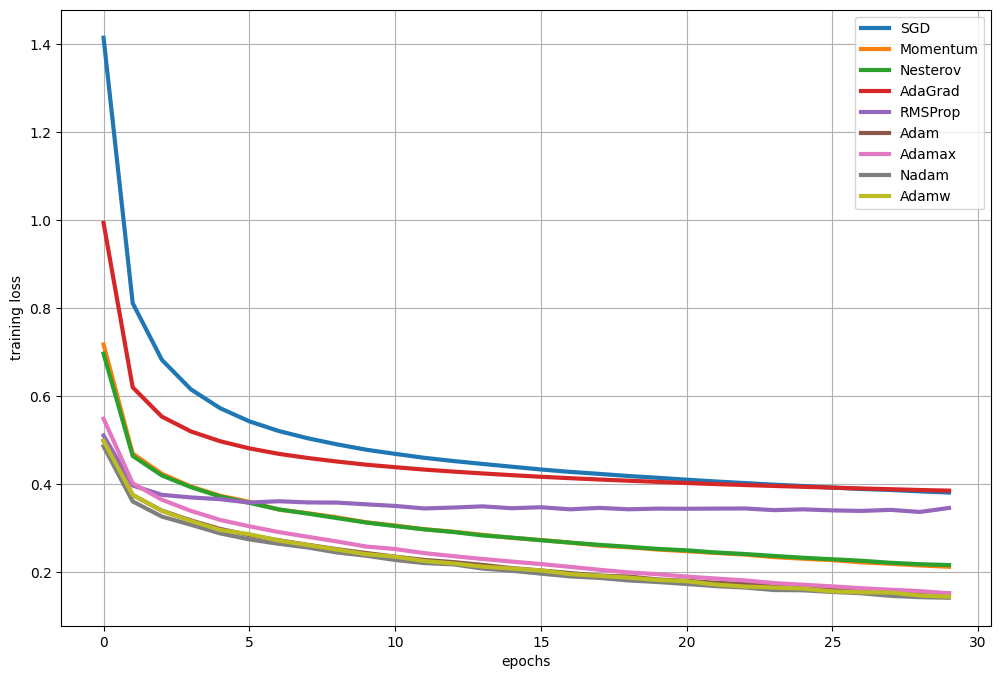

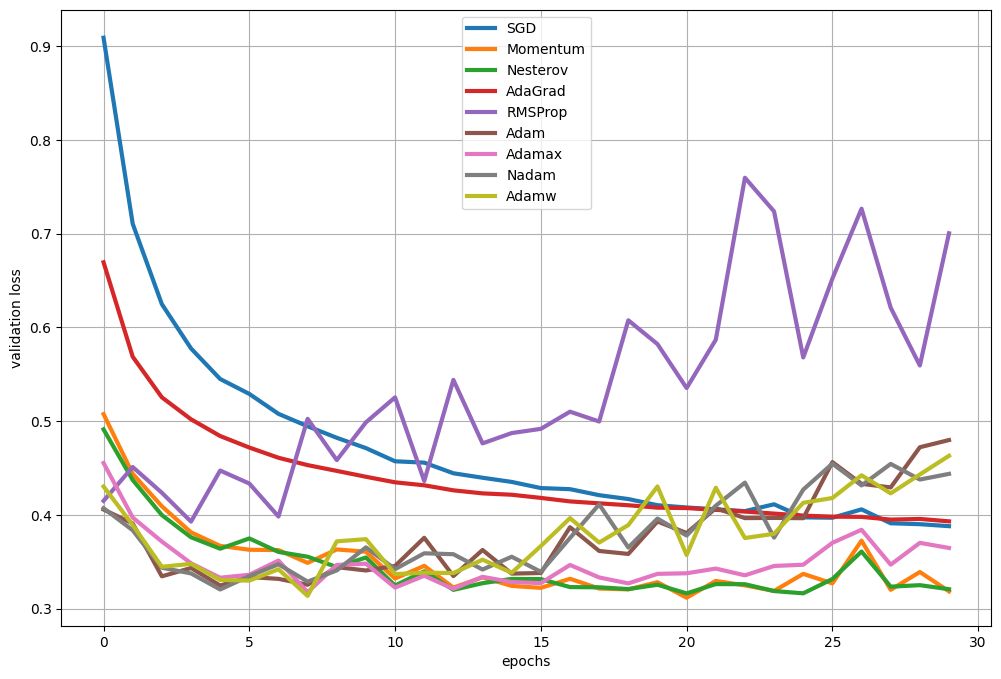

In [38]:
for loss in ("loss", "val_loss"):
  plt.figure(figsize=(12, 8))
  opt_names = "SGD Momentum Nesterov AdaGrad RMSProp Adam Adamax Nadam Adamw"
  for his, name in zip((history_sgd, his_momentum, his_neg, his_adagrad,
                       his_rmsprop, his_adam, his_adamax, his_nadam,
                       his_adamw), opt_names.split()):
    plt.plot(his.history[loss], label=f"{name}", linewidth=3)

  plt.grid()
  plt.xlabel("epochs")
  plt.ylabel({"loss": "training loss", "val_loss": "validation loss"}[loss])
  plt.legend()